In [2]:
import warnings 
warnings.filterwarnings("ignore") 
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from matplotlib import pyplot as plt 
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [3]:
df=pd.read_csv("segmentation_data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [5]:
df_temp=df[['ID','Age','Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [8]:
scaler=MinMaxScaler()

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income']=scaler.transform(df[['Income']])

In [9]:
df=df.drop(['ID'],axis=1)

In [10]:
# To the kmodes we need to convert to float
mark_array=df.values

mark_array[:,2]=mark_array[:,2].astype(float)
mark_array[:,4]=mark_array[:,4].astype(float)

In [11]:
kproto=KPrototypes(n_clusters=10,verbose=2,max_iter=20)
clusters=kproto.fit_predict(mark_array,categorical=[0,1,3,5,6])

print(kproto.cluster_centroids_)
len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 830, ncost: 184.71892509060595
Run: 1, iteration: 2/20, moves: 298, ncost: 172.1879937545417
Run: 1, iteration: 3/20, moves: 180, ncost: 166.52079325896653
Run: 1, iteration: 4/20, moves: 47, ncost: 166.43497970356665
Run: 1, iteration: 5/20, moves: 1, ncost: 166.43490881929796
Run: 1, iteration: 6/20, moves: 0, ncost: 166.43490881929796
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 653, ncost: 199.0566798089633
Run: 2, iteration: 2/20, moves: 91, ncost: 198.75477562768356
Run: 2, iteration: 3/20, moves: 8, ncost: 198.75047913279533
Run: 2, iteration: 4/20, moves: 10, ncost: 198.74287002506264
Run: 2, iteration: 5/20, moves: 3, ncost: 198.74248762320315
Run: 2, iteration: 6/20, moves: 1, ncost: 198.74241679077588
Run: 2, iteration: 7/20

10

In [12]:
clusters_dict=[]
for c in clusters:
    clusters_dict.append(c)

df['cluster']=clusters_dict

df[['ID','Age','Income']]=df_temp

In [13]:
df[df['cluster']==0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
17,0,0,25,0,157434,1,2,0,100000018
19,0,0,31,0,144657,1,1,0,100000020
31,0,0,27,0,120131,1,1,0,100000032
32,0,0,30,0,162745,1,2,0,100000033
35,0,0,25,0,104505,0,0,0,100000036
36,0,0,31,0,143385,1,2,0,100000037
39,0,0,24,0,92542,1,1,0,100000040
50,0,0,29,0,84531,0,0,0,100000051
52,0,0,25,0,92058,1,2,0,100000053
53,0,0,31,0,117158,1,0,0,100000054


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


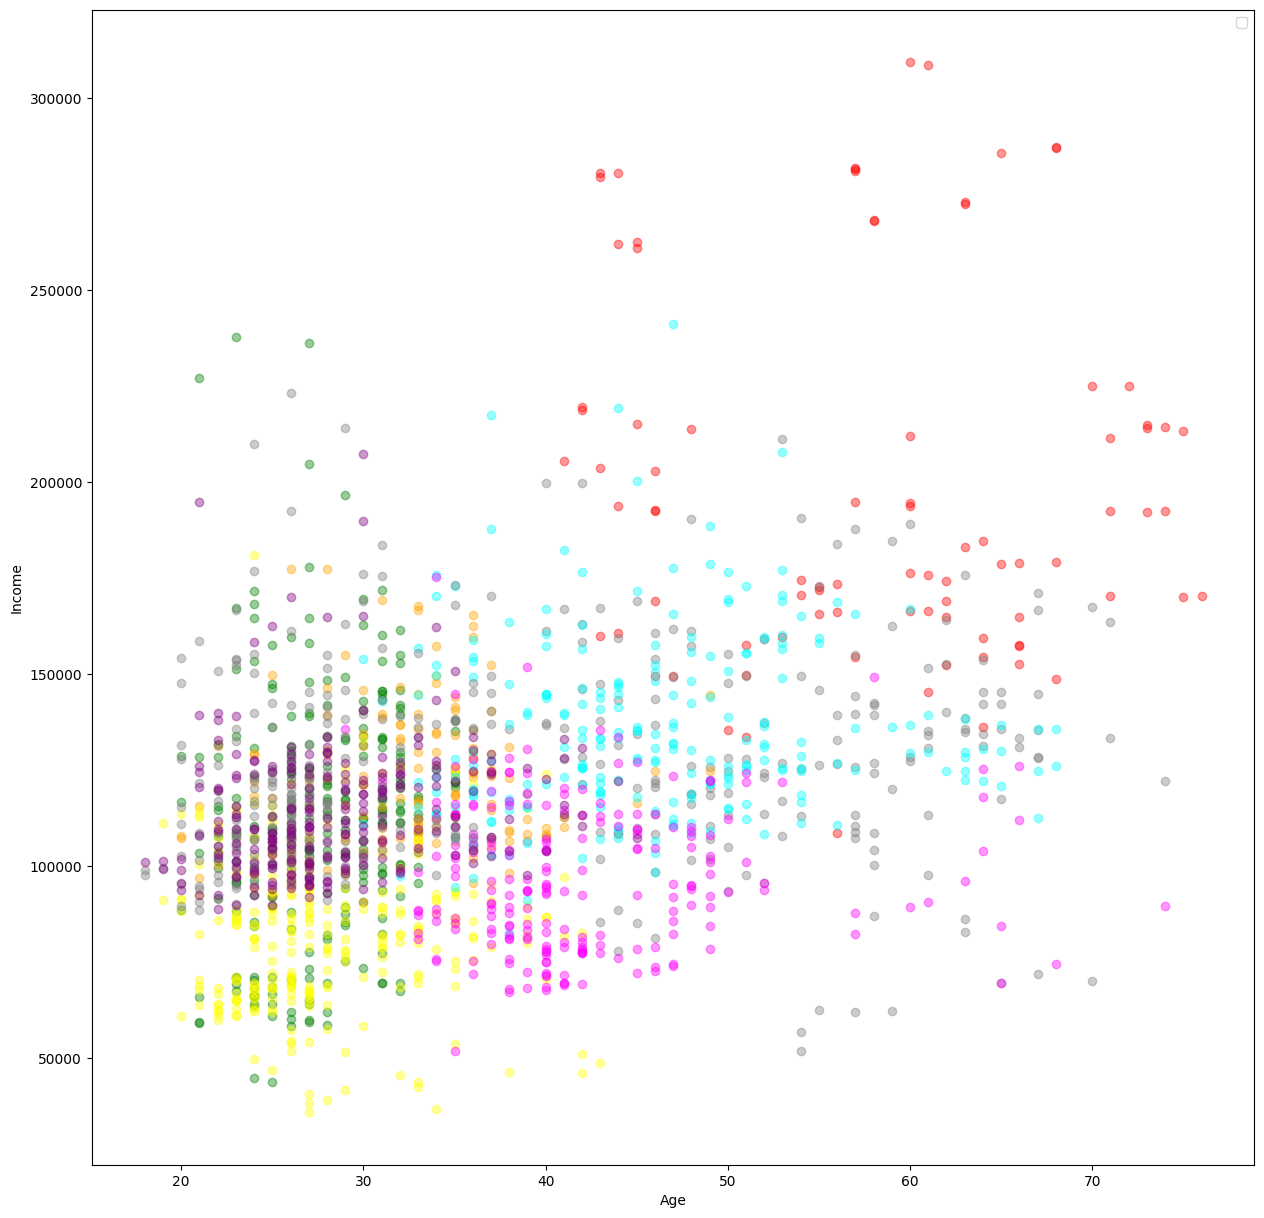

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==6]
df7 = df[df.cluster==7]
df8 = df[df.cluster==8]
df9 = df[df.cluster==9]
df10 = df[df.cluster==10]


plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age, df1['Income'],color='green', alpha = 0.4)
plt.scatter(df2.Age, df2['Income'],color='red', alpha = 0.4)
plt.scatter(df3.Age, df3['Income'],color='gray', alpha = 0.4)
plt.scatter(df4.Age, df4['Income'],color='orange', alpha = 0.4)
plt.scatter(df5.Age, df5['Income'],color='yellow', alpha = 0.4)
plt.scatter(df6.Age, df6['Income'],color='cyan', alpha = 0.4)
plt.scatter(df7.Age, df7['Income'],color='magenta', alpha = 0.4)
plt.scatter(df8.Age, df8['Income'],color='gray', alpha = 0.4)
plt.scatter(df9.Age, df9['Income'],color='purple', alpha = 0.4)
plt.scatter(df10.Age, df10['Income'],color='blue', alpha = 0.4)



plt.legend()
plt.show()